# Create SN input model

In [1]:
import os
os.getcwd()

'/Users/long/Projects/Python/release-models/tardis/python'

In [2]:
from astropy.table import Table
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def make_1d_sn(rmin=1.23552e15,rmax=2.2464e15,rho=6.584e-14,v=1.1e9,exp=7,npt=100):
    r=np.logspace(np.log10(rmin),np.log10(rmax),npt-1)

    r=[0.99*rmin] + list(r) + [1.01*rmax]
    # print(r)
    # print(len(r))
    i=np.linspace(0,len(r)-1,len(r))
    # print(i)
    i=np.arange(0,101,1)
    # print(i)
    xtab=Table([i,r],names=['i','r'])

    xtab['v']=v*xtab['r']/xtab['r'][0]
    xtab['rho']=rho*(xtab['r']/xtab['r'][0])**(-exp)
    xtab['r'].format='.4e'
    xtab['v'].format='.4e'
    xtab['rho'].format='.4e'
    # xtab['r'].format='.4e'
    return xtab
    
    
xxtab=make_1d_sn()
    

In [4]:
def plot_density(xfile='1d_sn.master.txt'):
    xtab=ascii.read(xfile)
    # xtab.info()
    plt.figure(1,(6,6))
    plt.loglog(xtab['r'],xtab['rho'],label='Python')
    foo=xtab['rho'][1]*(xtab['r']/xtab['r'][1])**(-2)
    print(foo)
    plt.loglog(xtab['r'],foo,label=r'1/r$^2$')
    plt.xlabel('R (cm)')
    plt.ylabel(r'$\rho$')
    plt.legend()
    return xtab

python=plot_density()
plt.loglog(xxtab['r'],xxtab['rho'],label='New')
tardis=ascii.read('/Users/long/Projects/tardis/tardis.master.txt')
tardis.info()
plt.loglog(tardis['r_in'],tardis['rho'],label='Tardis')
plt.legend()

FileNotFoundError: [Errno 2] No such file or directory: '1d_sn.master.txt'

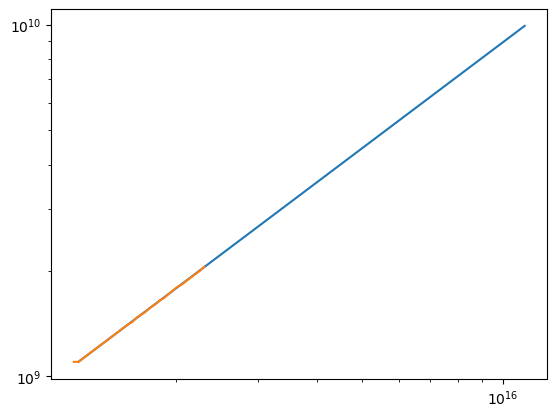

In [5]:
plt.loglog(tardis['r_in'],tardis['v_inner'],label='Tardis')
plt.loglog(python['r'],np.sqrt(python['v_x']**2+python['v_z']**2),label='Python')

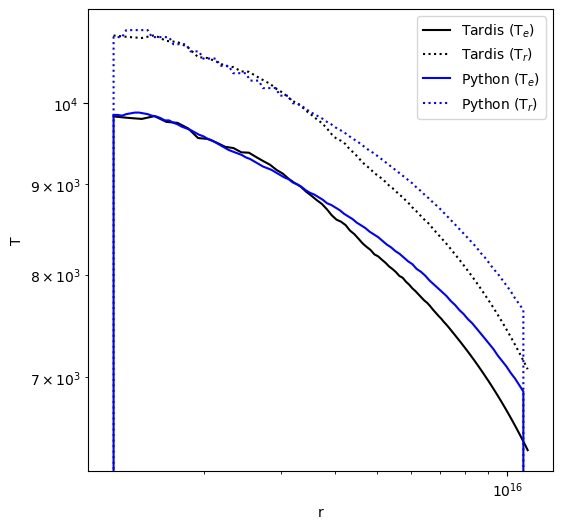

In [8]:
python=ascii.read('big.master.txt')
plt.figure(1,(6,6))
plt.clf()
plt.loglog(tardis['r_in'],tardis['t_e'],'k-',label=r'Tardis (T$_e$)')

plt.loglog(tardis['r_in'],tardis['t_r'],'k:',label=r'Tardis (T$_r$)')
plt.loglog(python['r'],python['t_e'],'b-',label=r'Python (T$_e$)')
plt.loglog(python['r'],python['t_r'],'b:',label=r'Python (T$_r$)')
plt.xlabel('r')
plt.ylabel('T')
plt.legend()

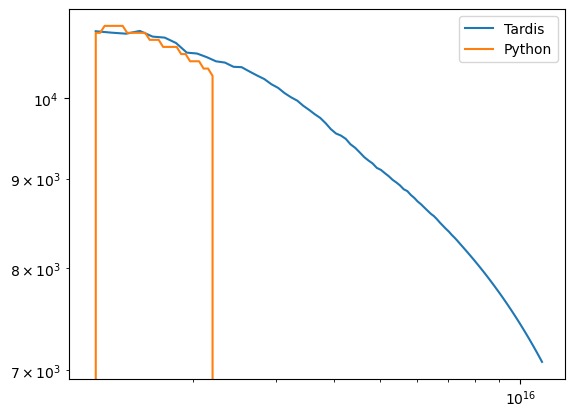

In [7]:
plt.loglog(tardis['r_in'],tardis['t_r'],label='Tardis')
plt.loglog(python['r'],python['t_r'],label='Python')
plt.legend()

<Table length=100>
name  dtype 
---- -------
   r float64
 i01 float64
 i02 float64
 i03 float64
 i04 float64
 i05 float64
 i06 float64
 i07 float64
 i08 float64
 i09 float64
 i10 float64
 i11 float64
 i12 float64
 i13 float64
 i14 float64
 tot float64


/var/folders/tq/5yb4qm590qxbk0ykb4ft0nyc000401/T/ipykernel_27191/456020817.py:49: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(-0.1,1.1)


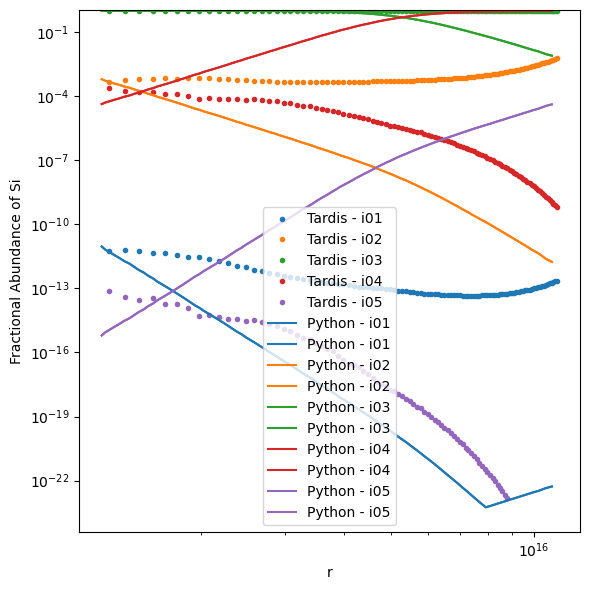

In [49]:
def compare_ion(element='Si',imax=4):
    tardis=ascii.read('/Users/long/Projects/tardis/tardis.%s.txt' % element)
    i=0
    tardis['tot']=0.0
    tcols=tardis.colnames
    color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']


    while i<len(tardis):
        xsum=0.0
        j=1
        while j<len(tcols):
            xsum+=tardis[tcols[j]][i]
            j+=1
        tardis['tot'][i]=xsum
            
        i+=1
    tardis.info()
    python=ascii.read('big.%s.frac.txt' % element)
    python=python[python['inwind']==0]

    plt.figure(1,(6,6))
    j=1
    ion=0
    color_index=0
    while j<len(tcols)-1:
        color=color_cycle[color_index]
        plt.semilogx(tardis['r'],tardis[tcols[j]]/tardis['tot'],'.',color=color,label='Tardis - %s' % tcols[j])
        j+=1
        ion+=1
        color_index+=1
        if ion>imax:
            break

    j=3
    pcols=python.colnames
    ion=0
    color_index=0
    while j<len(pcols):
        color=color_cycle[color_index]
        plt.semilogx(python['r'],python[pcols[j]],'-',color=color,label='Python - %s' % pcols[j])
        plt.loglog(python['r'],python[pcols[j]],'-',color=color,label='Python - %s' % pcols[j])
        j+=1
        ion+=1
        color_index+=1
        if ion>imax:
            break
    plt.legend()
    plt.ylim(-0.1,1.1)
    plt.xlabel('r')
    plt.ylabel('Fractional Abundance of %s' % element)
    plt.tight_layout()
    



    


compare_ion()

<Table length=100>
name  dtype 
---- -------
   r float64
 i01 float64
 i02 float64
 i03 float64
 i04 float64
 i05 float64
 i06 float64
 i07 float64
 i08 float64
 tot float64


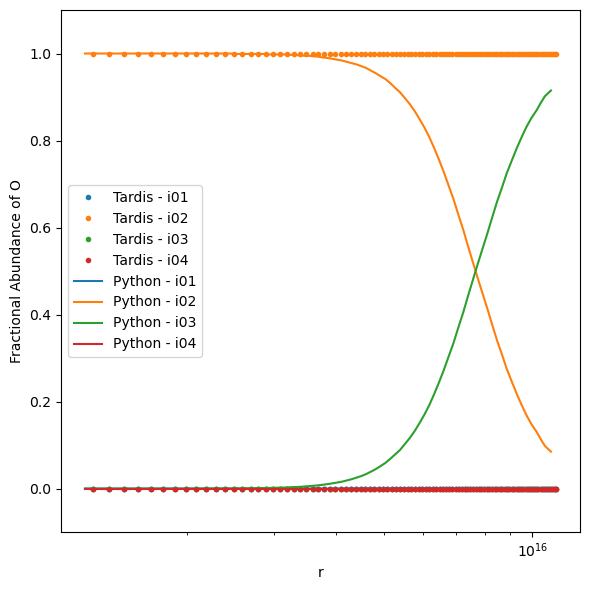

In [47]:
compare_ion(element='O',imax=3)

<Table length=100>
name  dtype 
---- -------
   r float64
 i01 float64
 i02 float64
 i03 float64
 i04 float64
 i05 float64
 i06 float64
 i07 float64
 i08 float64
 i09 float64
 i10 float64
 i11 float64
 i12 float64
 i13 float64
 i14 float64
 i15 float64
 i16 float64
 i17 float64
 i18 float64
 i19 float64
 i20 float64
 tot float64


/var/folders/tq/5yb4qm590qxbk0ykb4ft0nyc000401/T/ipykernel_27191/456020817.py:49: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(-0.1,1.1)


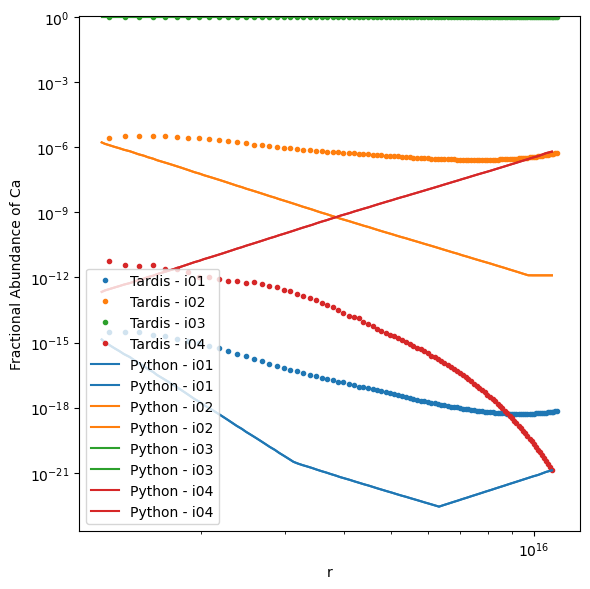

In [50]:
compare_ion(element='Ca',imax=3)